In [1]:
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.basemap import Basemap

In [4]:
plt.figure(figsize = (14,14))

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

In [7]:
#Lower Left Corner Latitude Longitude
#Uper Right Corner Latitude Longitude
#Initialize the base map
m = Basemap(llcrnrlat = 30,
            llcrnrlon = -126,
            urcrnrlat = 45,
            urcrnrlon = -114,
            resolution='h')


/Users/sk186089/anaconda3/envs/skoda/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image


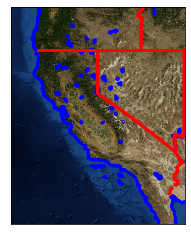

In [12]:
# Get the area of interest imagery
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=2500, verbose=True, alpha=0.6)
# Draw Coastline
m.drawcoastlines(color='blue',linewidth=3)
# Draw States
m.drawstates(color='red',linewidth=3)

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('uscities.csv')

In [15]:
df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [21]:
cities = df.loc[df.state_id == 'CA',:]

In [24]:
lat, long = cities['lat'], cities['lng']

In [25]:
population, density = cities['population'], cities['density']

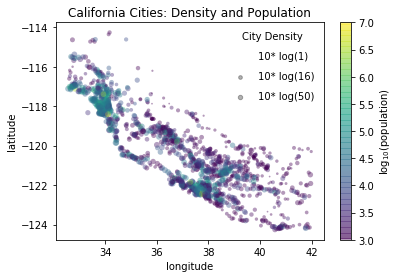

In [28]:
#
plt.scatter(lat, long, 
            label = None, 
            c=np.log10(population), 
            s=10*np.log10(density), 
            cmap='viridis',
            linewidth=0,
            alpha=0.4
           )
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# make a guide for the user
for density in [1, 50//3, 50]:
    plt.scatter([], [], c='k', alpha=0.3, s=5*np.log(density),
                label='10* log('+str(density) + ')')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Density')
# add a title
plt.title('California Cities: Density and Population');

/Users/sk186089/anaconda3/envs/skoda/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image


/Users/sk186089/anaconda3/envs/skoda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


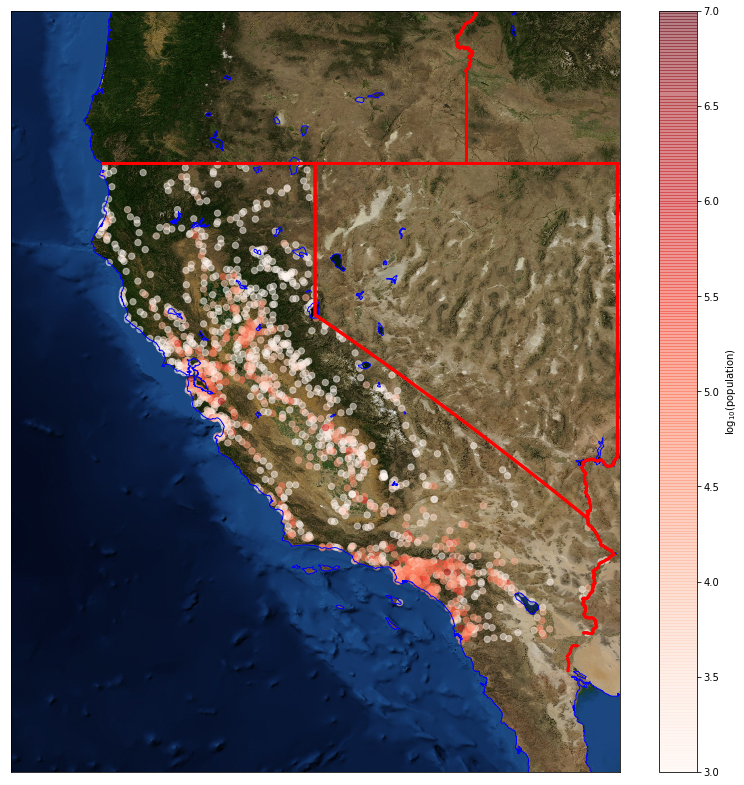

In [31]:
# Nessecary Imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Make the figure
plt.figure(figsize=(14, 14))
# Initialize the basemap
m = Basemap(llcrnrlat = 30,
            llcrnrlon = -126,
            urcrnrlat = 45,
            urcrnrlon = -114,
           resolution='h')
# Get the area of interest imagery
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, verbose= True,alpha= .6)
# Draw the coasts
m.drawcoastlines(color='blue', linewidth=1)
# Draw the states
m.drawstates(color='red',linewidth=3)
m.scatter(long, lat, latlon=True,
          c=np.log10(population), s=10*np.log(density),
          cmap='Reds', alpha=0.5)
# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)